## Objective
In this lab, you will analyze a customer dataset to identify key factors influencing customer churn, create visualizations to explore the data, and build a predictive model using machine learning. The goal is to extract actionable insights and present your findings in a comprehensive report.
## Scenario
You are a data analyst at a fast-growing subscription-based service company. The company is concerned about customer churn—customers canceling their subscriptions—and has tasked you with analyzing customer data. Your objectives are to identify key factors that influence churn and build a predictive model to identify customers at risk of leaving.
## Materials Provided
- A dataset (`customer_churn.csv`) preloaded into a Pandas DataFrame named `df`.
- Python environment with essential libraries such as Pandas, Scikit-Learn, Matplotlib, and Seaborn pre-installed.

## High-Level Tasks
1. **Load and Explore the Data**
2. **Data Cleaning and Preprocessing**
3. **Exploratory Data Analysis (EDA) and Visualization**
4. **Machine Learning Model Building and Evaluation**
5. **Presenting Findings in a Comprehensive Report**

## Lab Instructions
### 1. Load and Explore the Data (5 minutes)
#### Step 1.1: Import the required Python library and load dataset.

In [1]:
import pandas as pd 
df = pd.read_csv("customer_churn.csv")

#### Step 1.2: Display the First 5 Rows
Use the provided code cell to display the first 5 rows of the dataset.

In [2]:
# Display the first 5 rows of the dataframe
df.head()

,Unnamed: 0,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,Yes,1,2.7,1,265.1,110,89.0,9.87,10.0
1,1,0,107,Yes,1,3.7,1,161.6,123,82.0,9.78,13.7
2,2,0,137,Yes,0,0.0,0,243.4,114,52.0,6.06,12.2
3,3,0,84,No,0,0.0,2,299.4,71,57.0,3.10,6.6
4,4,0,75,No,0,0.0,3,166.7,113,41.0,7.42,10.1


#### Step 1.3: Examine Column Names and Data Types
Inspect the column names and data types using `df.info()`.

In [3]:
# Display column names and data types
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3333 non-null   int64  
 1   Churn            3333 non-null   int64  
 2   AccountWeeks     3333 non-null   int64  
 3   ContractRenewal  3333 non-null   object 
 4   DataPlan         3333 non-null   int64  
 5   DataUsage        3333 non-null   float64
 6   CustServCalls    3333 non-null   int64  
 7   DayMins          3333 non-null   float64
 8   DayCalls         3333 non-null   int64  
 9   MonthlyCharge    3333 non-null   float64
 10  OverageFee       3333 non-null   float64
 11  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 312.6+ KB


#### Step 1.4: Get Summary Statistics
Get summary statistics of numerical columns using `df.describe()`.

In [4]:
# Get summary statistics of numerical columns
### YOUR CODE HERE ###
df.describe()

,Unnamed: 0,Churn,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,0.144914,101.064806,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,962.29855,0.352067,39.822106,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,833.00000,0.000000,74.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,1666.00000,0.000000,101.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,2499.00000,0.000000,127.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,3332.00000,1.000000,243.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


#### Step 1.5: Remove CSV Index Column
The index from the csv turned into a column and should be dropped. Use `df.drop` to get rid of the `Unnamed: 0` column. Then use `df.describe()` again to confirm the column is removed.

In [5]:
# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

# Confirm the column is removed
print(df.describe())

             Churn  AccountWeeks     DataPlan    DataUsage  CustServCalls  \
count  3333.000000   3333.000000  3333.000000  3333.000000    3333.000000   
mean      0.144914    101.064806     0.276628     0.816475       1.562856   
std       0.352067     39.822106     0.447398     1.272668       1.315491   
min       0.000000      1.000000     0.000000     0.000000       0.000000   
25%       0.000000     74.000000     0.000000     0.000000       1.000000   
50%       0.000000    101.000000     0.000000     0.000000       1.000000   
75%       0.000000    127.000000     1.000000     1.780000       2.000000   
max       1.000000    243.000000     1.000000     5.400000       9.000000   

           DayMins     DayCalls  MonthlyCharge   OverageFee     RoamMins  
count  3333.000000  3333.000000    3333.000000  3333.000000  3333.000000  
mean    179.775098   100.435644      56.305161    10.051488    10.237294  
std      54.467389    20.069084      16.426032     2.535712     2.791840  
min   

#### Step 1.6: Identify Potential Features and Target Variable
Select all features from the dataset, except churn (e.g., `“AccountWeeks”`, `“DataPlan”`, `“Data Usage”`, etc) and set the target variable (`'Churn'`).

In [10]:
# Select all features and set target variable
### YOUR CODE HERE ###
# Define the features (all columns except 'Churn')
# Define the target variable
y = df['Churn']

# Define the feature variables (all columns except 'Churn')
X = df.drop('Churn', axis=1)

# Optional: Display the shapes of X and y to confirm
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3333, 10)
Target shape: (3333,)


### 2. Data Cleaning and Preprocessing (5 minutes)
#### Step 2.1: Encode Categorical Features
Encode the categorical features (e.g., `ContractRenewal`) using one-hot encoding.

In [11]:
# One-hot encoding for 'ContractRenewal' feature
### YOUR CODE HERE ###
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
print("Categorical columns:", categorical_cols)

# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

Categorical columns: Index(['ContractRenewal'], dtype='object')
   Churn  AccountWeeks  DataPlan  DataUsage  CustServCalls  DayMins  DayCalls  \
0      0           128         1        2.7              1    265.1       110   
1      0           107         1        3.7              1    161.6       123   
2      0           137         0        0.0              0    243.4       114   
3      0            84         0        0.0              2    299.4        71   
4      0            75         0        0.0              3    166.7       113   

   MonthlyCharge  OverageFee  RoamMins  ContractRenewal_Yes  
0           89.0        9.87      10.0                    1  
1           82.0        9.78      13.7                    1  
2           52.0        6.06      12.2                    1  
3           57.0        3.10       6.6                    0  
4           41.0        7.42      10.1                    0  


## Step 2.2: Split the Data
Split the data into training and testing sets (70% train, 30% test) using `train_test_split` from Scikit-Learn. 

Make sure to set the `random_state` parameter to 42 to ensure reproducibility and obtain the same results as the expected solution.

In [12]:
from sklearn.model_selection import train_test_split

# Split the data
### YOUR CODE HERE ###
# Separate features and target again if needed
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Optional: Check the shape of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (2333, 10)
Testing features shape: (1000, 10)
Training target shape: (2333,)
Testing target shape: (1000,)


### 3. Exploratory Data Analysis (EDA) and Visualization (20 minutes)
#### Step 3.1: Summary Statistics for Relevant Features
Calculate and print summary statistics for relevant features (e.g., average tenure for churned vs. non-churned customers).

In [14]:
# Summary statistics for churned vs. non-churned customers
### YOUR CODE HERE ###

# Print average tenure
### YOUR CODE HERE ###
relevant_features = [
    'AccountWeeks', 'DataPlan', 'DataUsage', 'CustServCalls',
    'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'
]

# Group by Churn and calculate mean
summary_stats = df.groupby('Churn')[relevant_features].mean()

# Display the summary statistics
print("Mean values of relevant features by Churn status:\n")
print(summary_stats)

Mean values of relevant features by Churn status:

       AccountWeeks  DataPlan  DataUsage  CustServCalls     DayMins  \
Churn                                                                 
0        100.793684  0.295439   0.862151       1.449825  175.175754   
1        102.664596  0.165631   0.546957       2.229814  206.914079   

         DayCalls  MonthlyCharge  OverageFee   RoamMins  
Churn                                                    
0      100.283158      55.816246    9.954618  10.158877  
1      101.335404      59.190062   10.623085  10.700000  


#### Step 3.2: Create Visualizations
Create visualizations (e.g., bar charts, histograms, box plots) to explore the relationships between features and the target variable (`'Churn'`).

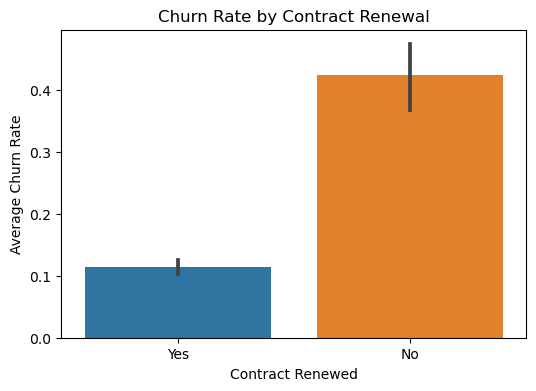

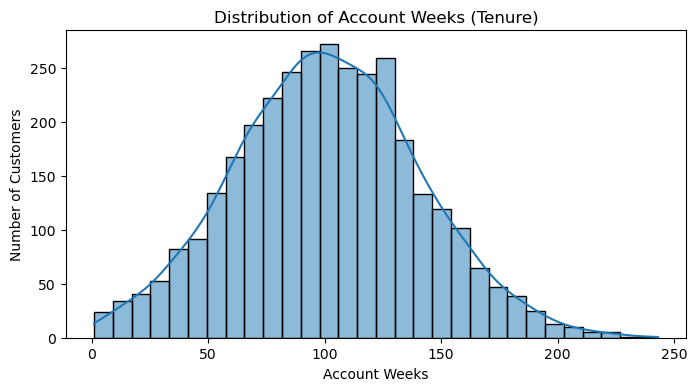

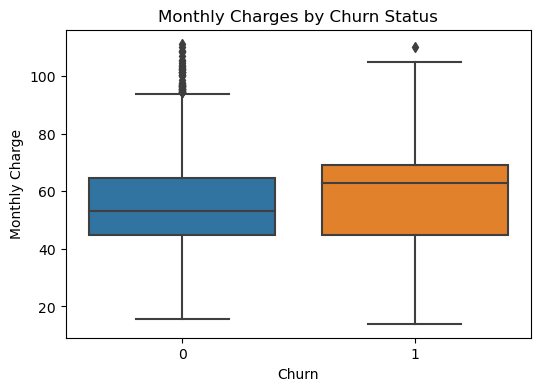

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: ContractRenewal vs Churn
plt.figure(figsize=(6, 4))
sns.barplot(x='ContractRenewal', y='Churn', data=df)
plt.title('Churn Rate by Contract Renewal')
plt.xlabel('Contract Renewed')
plt.ylabel('Average Churn Rate')
plt.show()

# Histogram for tenure distribution
### YOUR CODE HERE ###
plt.figure(figsize=(8, 4))
sns.histplot(df['AccountWeeks'], bins=30, kde=True)
plt.title('Distribution of Account Weeks (Tenure)')
plt.xlabel('Account Weeks')
plt.ylabel('Number of Customers')
plt.show()
# Box plot for monthly charges
### YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharge', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charge')
plt.show()

#### Step 3.3: Interpret Visualizations
Interpret the visualizations and identify key insights about factors influencing churn.  Enter your observations in the cell below:

Enter your observations about the visualizations here:

- Observation 1: 
- Observation 2: 
- Observation 3: 

### 4. Machine Learning Model Building and Evaluation (20 minutes)
#### Step 4.1: Choose a Classification Algorithm
Choose a suitable classification algorithm (e.g., `LogisticRegression`) and import it.

In [17]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
### YOUR CODE HERE ###
model = LogisticRegression(random_state=42, max_iter=1000)

#### Step 4.2: Train the Model
Train the model on the training data.

In [18]:
# Train the model
### YOUR CODE HERE ###
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Step 4.3: Make Predictions
Use the trained model to make predictions on the testing data.

In [19]:
# Make predictions on the test set
### YOUR CODE HERE ###
y_pred = model.predict(X_test)

#### Step 4.4: Evaluate the Model
Evaluate the model's performance using appropriate metrics (`accuracy_score`, `precision_score`, `recall_score`, `f1_score`).

**Note:** For grading purposes, calculate and store each of these metrics in the following variables:
- `accuracy`
- `precision`
- `recall`
- `f1`

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
# Round all values to 3 decimal places
### YOUR CODE HERE ###
# Evaluate the model predictions
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1 = round(f1_score(y_test, y_pred), 3)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.866
Precision: 0.596
Recall: 0.196
F1 Score: 0.295


#### Check Your Results:

In [21]:
# Print to check results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.866
Precision: 0.596
Recall: 0.196
F1 Score: 0.295


### 5. Presenting Findings in a Comprehensive Report
#### Step 5.1: Compile the Results
Compile your analysis, visualizations, and model evaluation results into a comprehensive report. Fill them in as directed below.
- `Introduction:` Write a sentence or two describing the purpose of this analysis.
- `Data Exploration:` Write a sentence or two highlighting the key factors in customer churn.
- `Model Building and Evaluation:` Write a sentence or two describing how your model was trained, and the accuracy, precision, and recall rates.
- `Key Insights:` Add two or three bullet points summarizing your findings.
- `Recommendations:` Add two or three bullet points with the recommendations you would make based on this analysis.

# Customer Churn Analysis Report

## Introduction
- 


## Data Exploration
- 


## Model Building and Evaluation
- 


## Key Insights
- 
- 
- 


## Recommendations
- 
- 

## Hints & Tips
- Use the "Pandas Cheat Sheet" for quick syntax reference on DataFrame operations.
- Check the "Scikit-Learn Documentation" for examples and explanations of classification models.
- Use Matplotlib for creating informative visualizations. Reference various materials in Course 2.

Good luck with your customer churn analysis!